In [ ]:
CSCI E-83 Project Proposal

In [ ]:
By Ekaterina Grinina

In [ ]:
Executive summary

In [ ]:
Sustainability is one of the most crucial responsibilities we have toward our children and future generations. Every decision we make, whether it's purchasing a new skirt or the latest model of an iPhone, should be evaluated through the lens of its ecological impact. This becomes especially important when it comes to products that have a significant influence on the environment, such as cars. In this project, I aim to address this issue in a straightforward manner by exploring how to choose a sustainable car, with a particular focus on CO2 emissions.
The goal of this project is to identify the key characteristics that correlate most strongly with CO2 emissions. Additionally, we will analyze which vehicle class is the most sustainable, meaning it produces the least amount of CO2 emissions. This information will be valuable in helping us make informed decisions when choosing a car to buy, rent, or even use as a taxi in the future.


In [ ]:
The data for this project is sourced from Kaggle https://www.kaggle.com/datasets/brsahan/vehicle-co2-emissions-dataset/data. The dataset contains information on 7,385 different cars and includes 12 variables, with "CO2 Emissions" being the dependent variable.

In [55]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from math import log, sqrt
import seaborn as sns
from math import log, sqrt, sin
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
%matplotlib inline
from sklearn.datasets import load_diabetes
import numpy.random as nr
import datetime
import statsmodels.api as sm
from statsmodels.graphics import mosaicplot
import calendar

In [56]:
df = pd.read_csv('C:/Users/Grini/OneDrive/Документы/HES/Data Science/Project//co2.csv')
df.head()


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
Preprocessing
Let's examine the basic information about the dataset to gain a better understanding of its structure and contents.

In [57]:
print("\nData Summary:")
print(df.describe())
print("\nData Information:")
print(df.info())


Data Summary:
       Engine Size(L)    Cylinders  Fuel Consumption City (L/100 km)  \
count     7385.000000  7385.000000                       7385.000000   
mean         3.160068     5.615030                         12.556534   
std          1.354170     1.828307                          3.500274   
min          0.900000     3.000000                          4.200000   
25%          2.000000     4.000000                         10.100000   
50%          3.000000     6.000000                         12.100000   
75%          3.700000     6.000000                         14.600000   
max          8.400000    16.000000                         30.600000   

       Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
count                      7385.000000                       7385.000000   
mean                          9.041706                         10.975071   
std                           2.224456                          2.892506   
min                           4.

In [ ]:
The dataset appears to contain information about vehicles, including their Make, Model, Vehicle Class, Engine Size (L), Cylinders, Transmission, Fuel Type, Fuel Consumption (in city, highway, and combined), and CO2 Emissions. This data provides insights into how vehicle features relate to fuel efficiency and CO2 emissions. The primary goal here is understanding the relationships between these features, not necessarily to predict outcomes

In [ ]:
Data Cleaning and Preprocessing
Before beginning the analysis, let's clean and prepare the data to ensure it is ready for exploration.

In [58]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [ ]:
There are no missing values in any of the columns, as the sum of missing values is zero for each feature

In [ ]:
Based on the overview of the boxplots, we observe the presence of several outliers across most variables. The approach for handling these outliers will be determined during the modeling phase, depending on the specific requirements of the analysis.

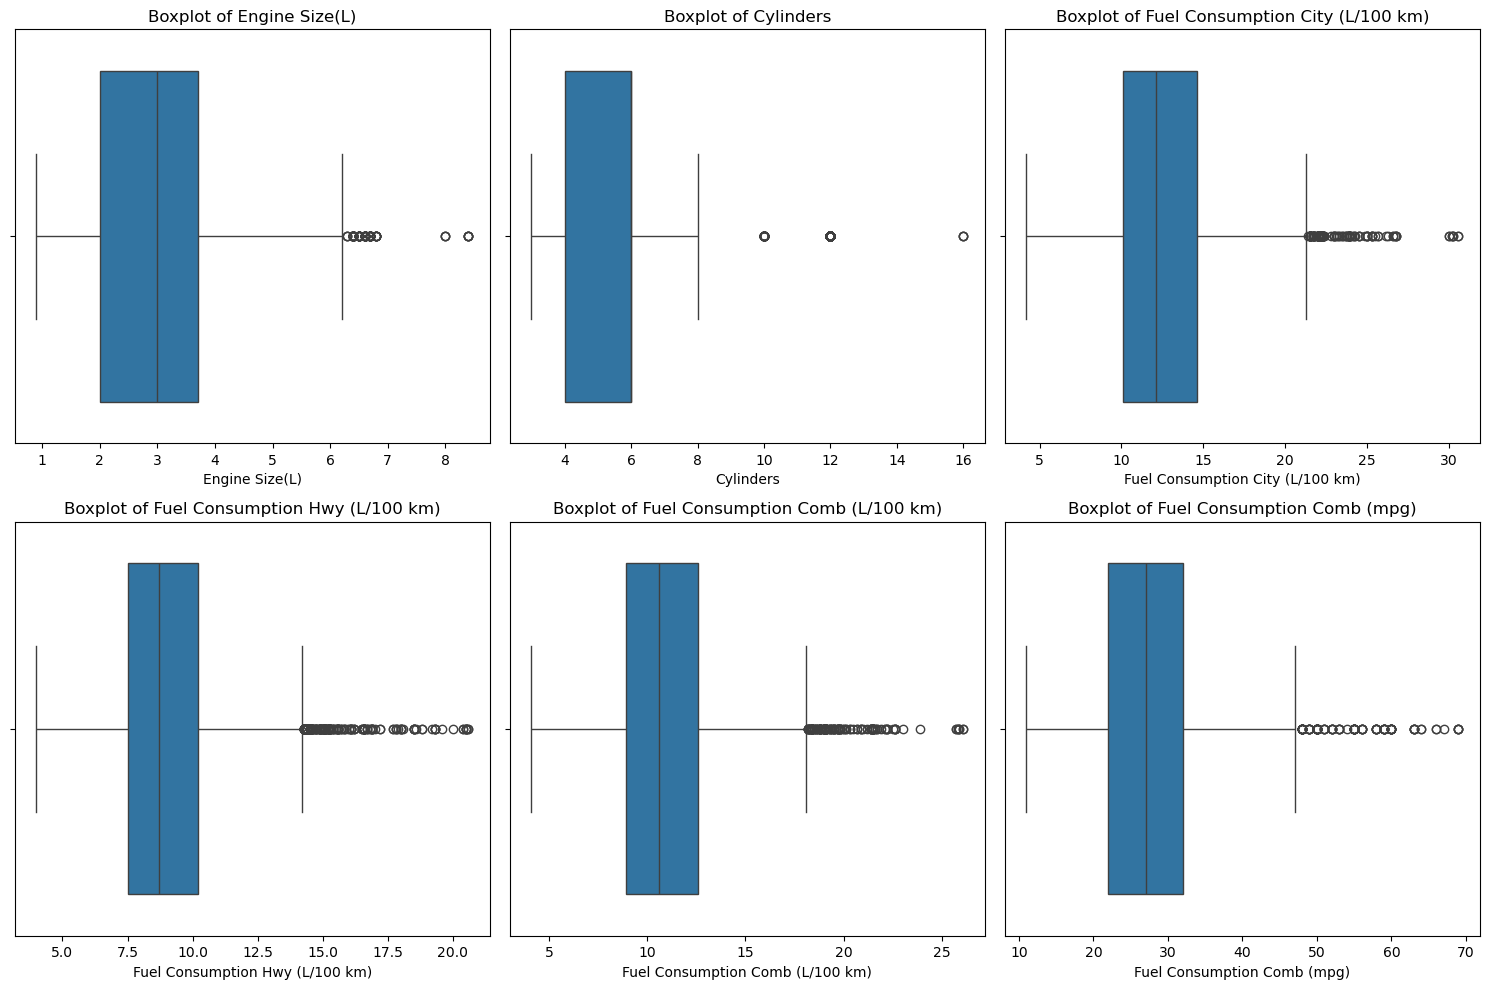

In [61]:
df_numeric = df.drop(columns=['CO2 Emissions(g/km)'], errors='ignore')
df_numeric = df_numeric.select_dtypes(include=['number'])
n_cols = 3 
n_rows = int(np.ceil(len(df_numeric.columns) / n_cols))
plt.figure(figsize=(n_cols*5, n_rows*5))
for i, column in enumerate(df_numeric.columns, 1):
    plt.subplot(n_rows, n_cols, i) 
    sns.boxplot(data=df_numeric, x=column)
    plt.title(f'Boxplot of {column}')
    
plt.tight_layout()
plt.show()

In [ ]:
Exploratory Data Analysis

In [ ]:
Visualize the distribution of CO2 emissions: the mean appears to be approximately 250, with a minimum of 96 and a maximum of 522.

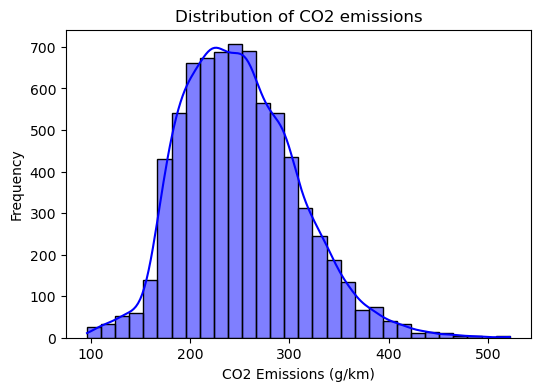

In [36]:
plt.figure(figsize=(6,4))
sns.histplot(df['CO2 Emissions(g/km)'], bins=30, kde=True, color='blue')
plt.title('Distribution of CO2 emissions')
plt.xlabel('CO2 Emissions (g/km)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
Visualizing the relationships between variables reveals a strong correlation between CO2 emissions, engine size, and fuel consumption.

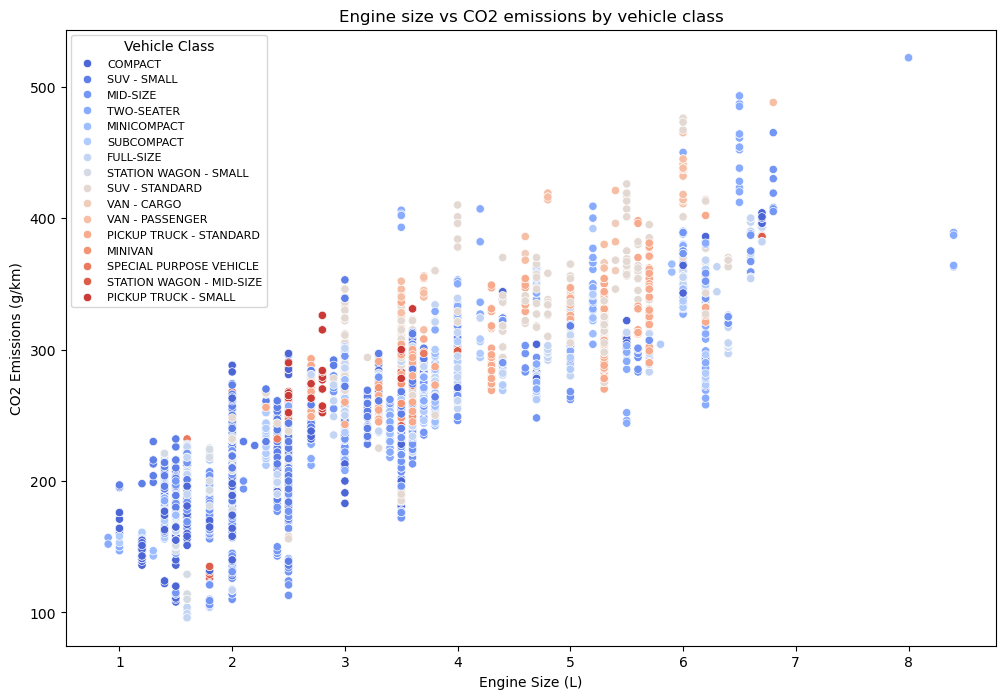

In [64]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='Engine Size(L)', y='CO2 Emissions(g/km)', hue='Vehicle Class', palette='coolwarm')
plt.title('Engine size vs CO2 emissions by vehicle class')
plt.xlabel('Engine Size (L)')
plt.ylabel('CO2 Emissions (g/km)')
plt.legend(title='Vehicle Class', fontsize=8, title_fontsize=10)
plt.show()

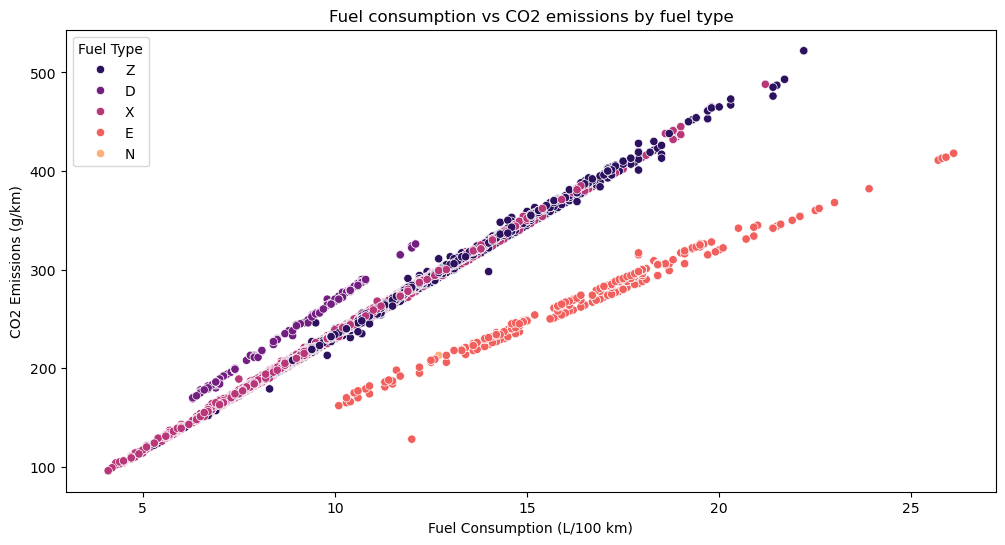

In [38]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='Fuel Consumption Comb (L/100 km)', y='CO2 Emissions(g/km)', hue='Fuel Type', palette='magma')
plt.title('Fuel consumption vs CO2 emissions by fuel type')
plt.xlabel('Fuel Consumption (L/100 km)')
plt.ylabel('CO2 Emissions (g/km)')
plt.show()

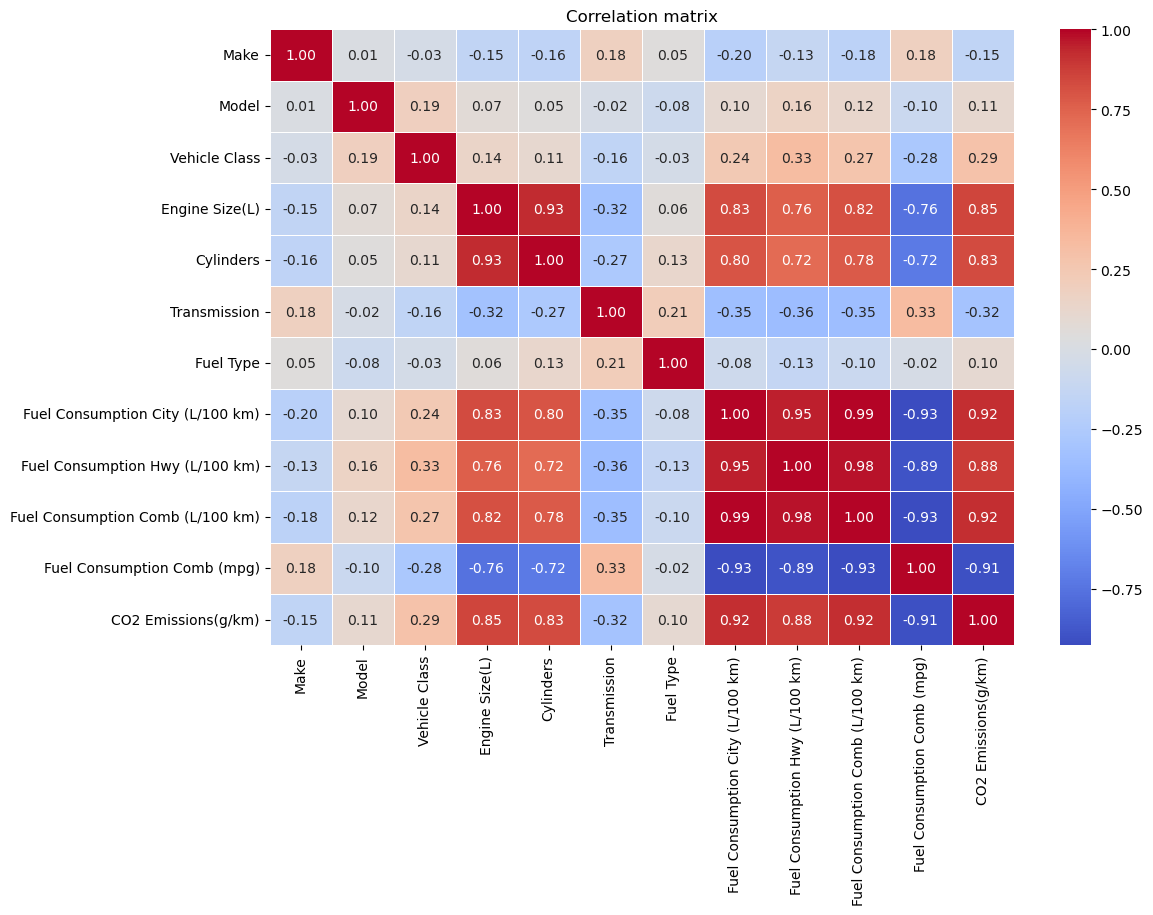

In [39]:
df_encoded = df.copy()

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in df_encoded.select_dtypes(include=[object]):
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])
corr_matrix = df_encoded.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation matrix')
plt.show()

C:\Users\Grini\AppData\Local\Temp\ipykernel_18936\3879350699.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Vehicle Class', y='CO2 Emissions(g/km)', palette='Set2')


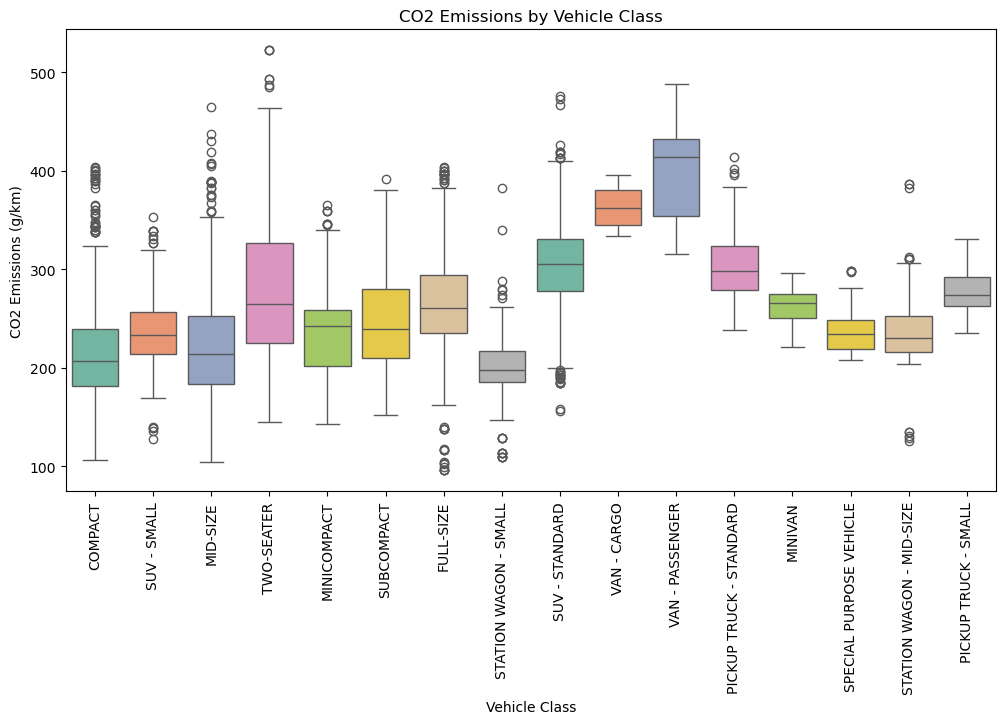

In [43]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Vehicle Class', y='CO2 Emissions(g/km)', palette='Set2')
plt.title('CO2 Emissions by vehicle class')
plt.xticks(rotation=90)
plt.ylabel('CO2 Emissions (g/km)')
plt.show()

C:\Users\Grini\AppData\Local\Temp\ipykernel_18936\1119649751.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Make', y='CO2 Emissions(g/km)', palette='Set1')


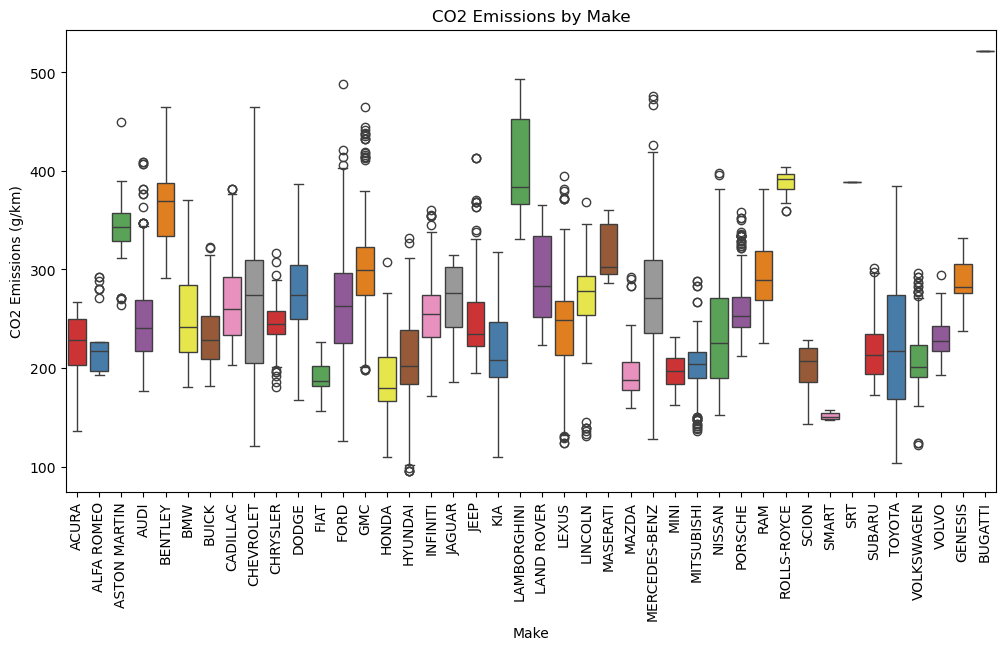

In [47]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Make', y='CO2 Emissions(g/km)', palette='Set1')
plt.title('CO2 Emissions by Make')
plt.xticks(rotation=90)
plt.ylabel('CO2 Emissions (g/km)')
plt.show()

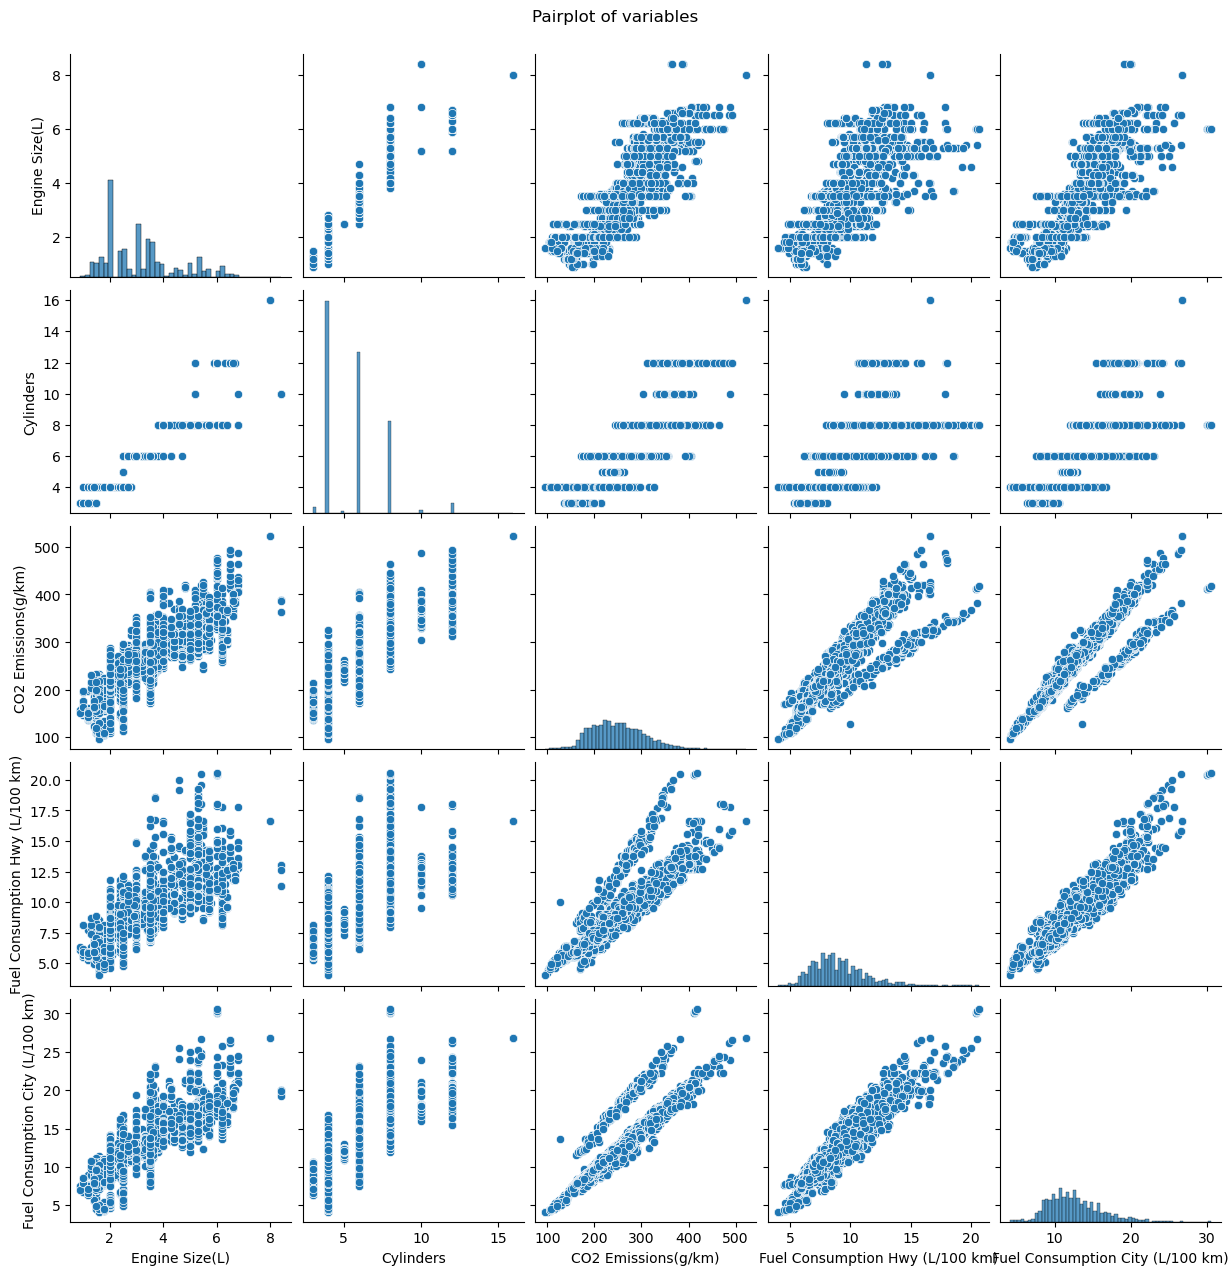

In [63]:
sns.pairplot(df[['Engine Size(L)', 'Cylinders', 'CO2 Emissions(g/km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption City (L/100 km)']])
plt.suptitle('Pairplot of variables', y=1.02)
plt.show()

In [ ]:
Let's use facet plots to explore more complex relationships of interactions between multiple variables, and apply log transformation to 'Engine Size(L)' and 'CO2 Emissions(g/km)

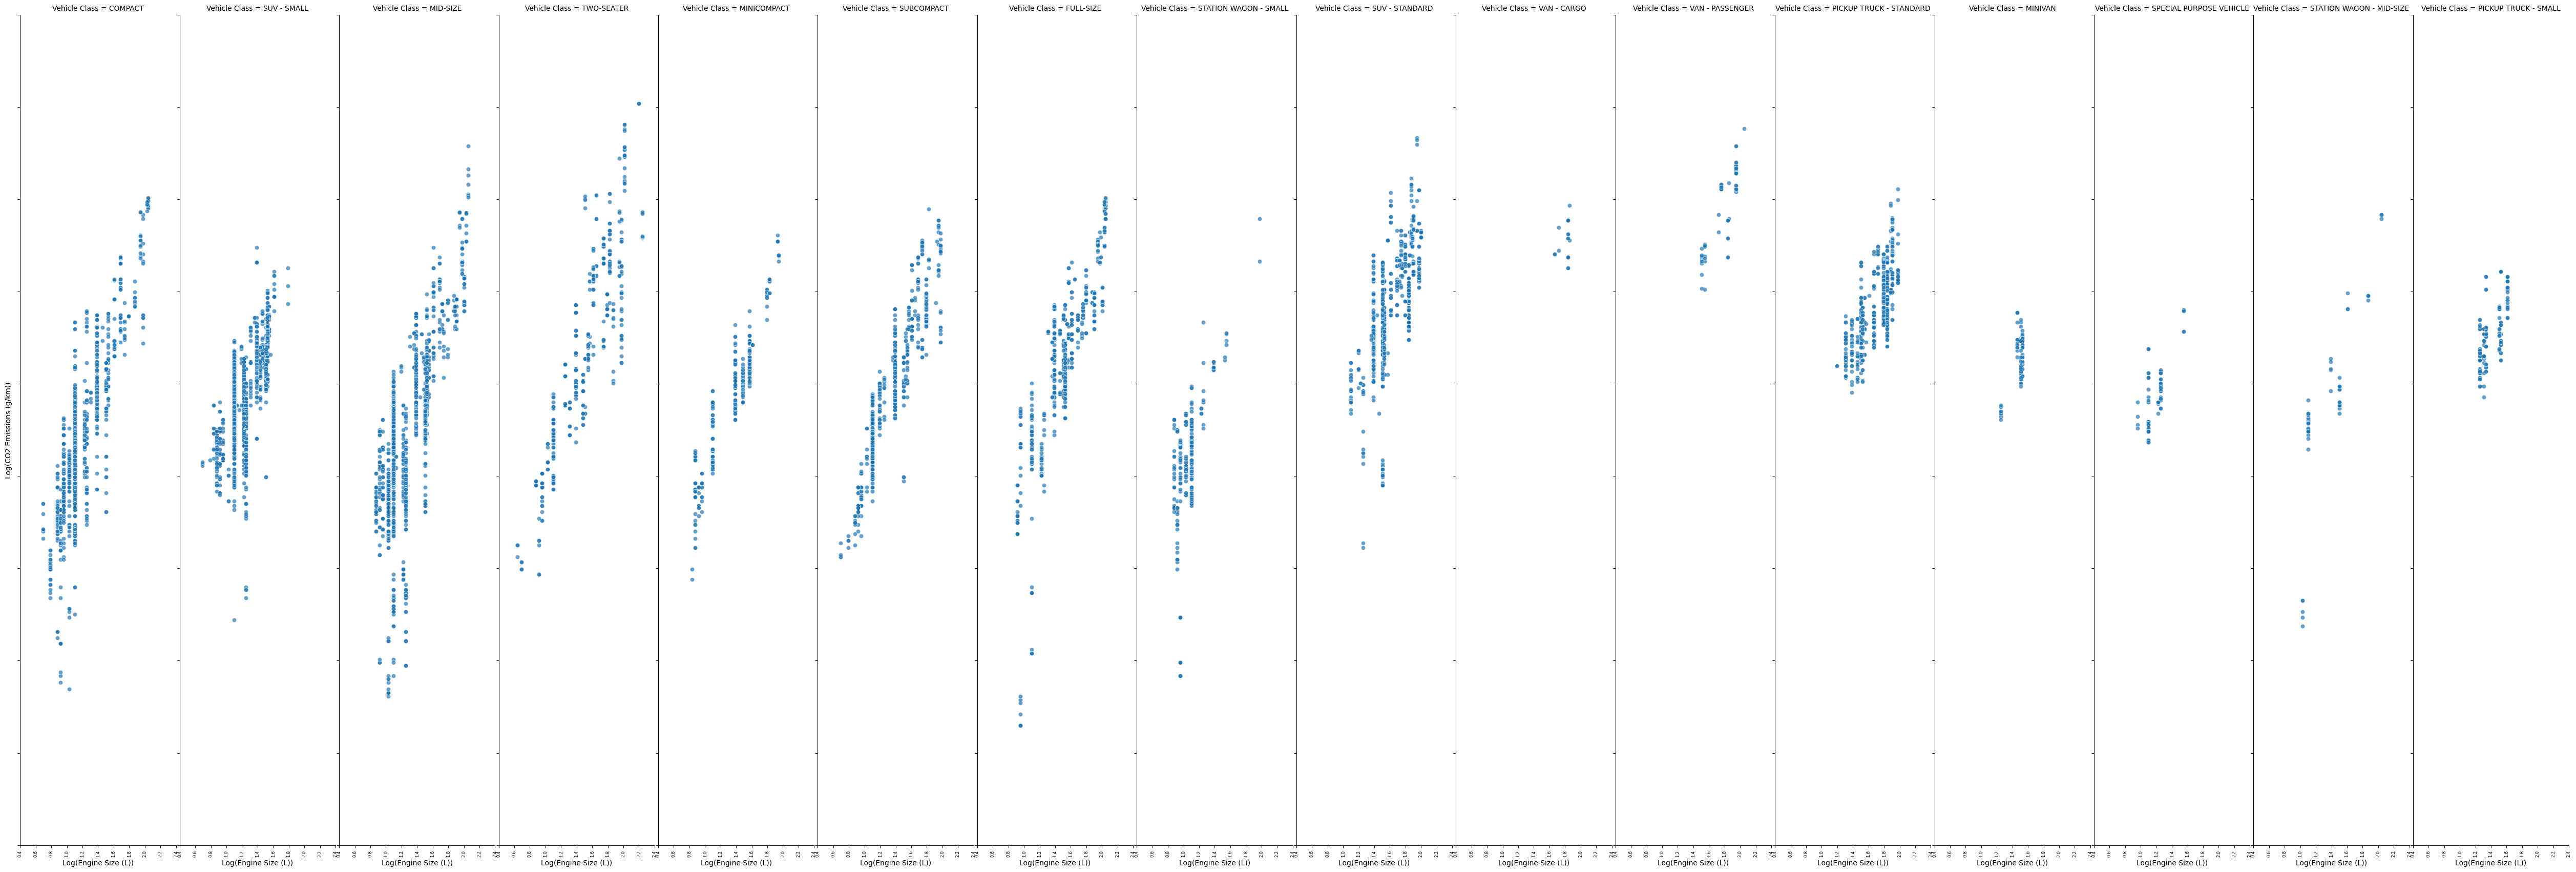

In [85]:
df_filtered = df[['Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Fuel Type', 
                  'Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']].copy()
df_filtered['Log Engine Size(L)'] = np.log1p(df_filtered['Engine Size(L)'])
df_filtered['Log CO2 Emissions(g/km)'] = np.log1p(df_filtered['CO2 Emissions(g/km)'])
facet = sns.FacetGrid(df_filtered, col='Vehicle Class', height=7, aspect=1.8, 
                      margin_titles=True)
facet.map(sns.scatterplot, 'Log Engine Size(L)', 'Log CO2 Emissions(g/km)', alpha=0.7)
facet.set_axis_labels('Log(Engine Size (L))', 'Log(CO2 Emissions (g/km))')
facet.set_titles(col_template='{col_name}', row_template='{row_name}')
facet.set_xticklabels(rotation=90)
plt.tight_layout()
plt.subplots_adjust(top=0.5)  
facet.fig.set_size_inches(50, 40) 

facet.set_titles(fontsize=6)
facet.set_axis_labels(fontsize=6)
facet.set_xticklabels(fontsize=6)
facet.set_yticklabels(fontsize=6)
for ax in facet.axes.flat:
    for label in ax.get_xticklabels():
        label.set_fontsize(6)
    for label in ax.get_yticklabels():
        label.set_fontsize(6)
plt.show()

In [ ]:
As the next step, I plan to test several hypotheses. One of these hypotheses is that Fuel Type does not influence CO2 Emissions. To test this, I will perform a statistical analysis using ANOVA (Analysis of Variance), which is suitable for comparing the means of CO2 emissions across different groups (in this case, the fuel types).

Null Hypothesis (H₀): Fuel Type does not influence CO2 Emissions (i.e., the mean CO2 emissions are the same across all fuel types).

Alternative Hypothesis (H₁): Fuel Type influences CO2 Emissions (i.e., at least one fuel type has a different mean CO2 emission).

In [88]:
df_filtered = df[['Fuel Type', 'CO2 Emissions(g/km)']].dropna()

In [ ]:
Boxplot for visualizing the relationship between Fuel Type and CO2 Emissions

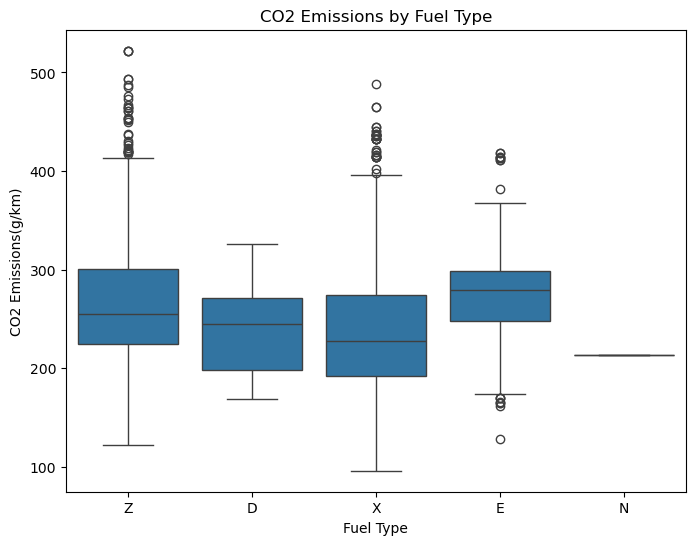

In [90]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Fuel Type', y='CO2 Emissions(g/km)', data=df_filtered)
plt.title('CO2 Emissions by Fuel Type')
plt.show()

In [ ]:
Normality test: Shapiro-Wilk test for each fuel type group

In [96]:
from scipy import stats
fuel_types = df_filtered['Fuel Type'].unique()

for fuel in fuel_types:
    group = df_filtered[df_filtered['Fuel Type'] == fuel]['CO2 Emissions(g/km)']
    if len(group) < 3:
        print(f"Skipping Shapiro-Wilk test for {fuel} because there are fewer than 3 data points.")
        continue
    stat, p = stats.shapiro(group)
    print(f"Shapiro-Wilk test for {fuel}: p-value = {p}")
    
    if p < 0.05:
        print(f"  => The data for {fuel} does not follow a normal distribution.")
    else:
        print(f"  => The data for {fuel} follows a normal distribution.")

Shapiro-Wilk test for Z: p-value = 3.203569672481698e-28
  => The data for Z does not follow a normal distribution.
Shapiro-Wilk test for D: p-value = 6.559873777058445e-07
  => The data for D does not follow a normal distribution.
Shapiro-Wilk test for X: p-value = 7.10260301207607e-22
  => The data for X does not follow a normal distribution.
Shapiro-Wilk test for E: p-value = 0.00012588671434176155
  => The data for E does not follow a normal distribution.
Skipping Shapiro-Wilk test for N because there are fewer than 3 data points.


In [ ]:
The results from the Shapiro-Wilk test indicate that the CO2 emissions for each fuel type (Z, D, X, E) do not follow a normal distribution, as the p-values are all much smaller than 0.05. This violates the assumption of normality required for performing an ANOVA

In [ ]:
Next Steps: Enhancing Analysis with Random Sampling and Resampling Methods (Bootstrapping). By combining Random Sampling and Bootstrapping, we aim to provide more reliable conclusions

In [ ]:
Random Sampling Approach

In [ ]:
Randomly select a subset of data points from each fuel type group for a fixed sample size
Perform hypothesis testing on these random samples
Repeat the sampling process multiple times to assess the stability and reliability

In [ ]:
 Resampling Methods (Bootstrapping)

In [ ]:
Generate multiple bootstrap samples by sampling with replacement from the original dataset
For each bootstrap sample, compute a statistic
Analyze the distribution of the computed statistics
Build confidence intervals around the statistics to understand the variability and significance of the observed results